In [1]:
cd ../..

C:\Users\abcd2\OneDrive\Documents\GitHub\strong_lensing_vit_resnet


In [2]:
import numpy as np

from pathlib import Path
from predict import ModelPredictor

In [3]:
dir_output = Path("C:/Users/abcd2/Downloads/vit_1__lr_1em3__dp_1em1")
path_config = Path(f"{dir_output}/CONFIG.npy")
path_model = Path(f"{dir_output}/epoch_17_testloss_0.222014.mdl")
file_name_pred = "vit_1__lr_1em3__dp_1em1"


CONFIG = np.load(path_config, allow_pickle=True).item()
CONFIG["dataset_folder"] = Path("C:/Users/abcd2/Datasets/2022_icml_lens_sim/geoff_1200")

CONFIG

{'epoch': 100,
 'batch_size': 20,
 'load_new_model': True,
 'new_model_name': 'google/vit-base-patch16-224',
 'resumed_model_path': WindowsPath('.'),
 'output_folder': WindowsPath('C:/Users/abcd2/Downloads/vit_1__lr_1em3__dp_1em1'),
 'dataset_folder': WindowsPath('C:/Users/abcd2/Datasets/2022_icml_lens_sim/geoff_1200'),
 'init_learning_rate': 0.001,
 'dropout_rate': 0.1,
 'target_keys_weights': {'theta_E': 1,
  'gamma': 1,
  'center_x': 1,
  'center_y': 1,
  'e1': 1,
  'e2': 1,
  'lens_light_R_sersic': 1,
  'lens_light_n_sersic': 1}}

In [4]:
ModelPredictor(CONFIG, path_model, file_name_pred)

Number of test samples = 1200
 
Use device = cuda:0

Start predicting



100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:16<00:00,  3.61it/s]

Done :)



In [23]:
%pylab inline

import pandas as pd
import seaborn as sns

df = pd.read_csv(f"{file_name_pred}.csv")
df.head()

Populating the interactive namespace from numpy and matplotlib


,theta_E____truth,gamma____truth,center_x____truth,center_y____truth,e1____truth,e2____truth,lens_light_R_sersic____truth,lens_light_n_sersic____truth,theta_E____pred,gamma____pred,...,lens_light_R_sersic____pred,lens_light_n_sersic____pred,theta_E____sigma,gamma____sigma,center_x____sigma,center_y____sigma,e1____sigma,e2____sigma,lens_light_R_sersic____sigma,lens_light_n_sersic____sigma
0,-1.370978,-0.545854,-1.067575,1.431359,0.188527,-1.213736,-0.763033,-0.155175,-1.099955,-0.091718,...,-0.461392,-0.448933,0.098717,0.712212,0.290182,0.229743,0.183278,0.193939,0.660057,1.049623
1,1.407446,-0.482065,-1.191585,-0.640588,-0.370939,-0.285285,-0.114521,0.374308,1.339431,-0.423130,...,-0.083442,-0.248424,0.139721,0.502434,0.124917,0.105719,0.095989,0.090818,0.458542,0.917335
2,0.504388,-0.191637,-0.326839,-0.051583,0.367481,-0.433281,-1.032905,-0.729178,0.644534,-0.443680,...,-1.132365,-0.376187,0.075035,0.518629,0.136492,0.109814,0.091143,0.094548,0.446643,0.939323
3,-0.809359,-0.029186,0.724951,-0.059996,0.215291,-0.883476,-0.497487,-0.828787,-0.694959,0.839575,...,-0.896015,-0.260482,0.075131,0.850328,0.153316,0.121790,0.114748,0.113460,0.512634,0.993310
4,2.549218,0.238433,-0.676748,-0.264565,-0.165377,-1.099201,0.205287,-0.504998,2.786195,0.301800,...,-0.598101,-0.242166,0.246993,0.639364,0.132003,0.117613,0.105240,0.102016,0.523375,0.965760


In [24]:
targets_list = CONFIG["target_keys_weights"].keys()
targets_list

dict_keys(['theta_E', 'gamma', 'center_x', 'center_y', 'e1', 'e2', 'lens_light_R_sersic', 'lens_light_n_sersic'])

In [27]:
def plot_each_pred_truth_uncertainty(df, target):

    sns.set(style="white", font_scale=1)
    fig, ax = plt.subplots(figsize=(8,8))
    plt.figure(figsize=(3, 3))

    ax.set_aspect('equal', adjustable='box')
    x = df[f"{target}____truth"]
    y = df[f"{target}____pred"]
    z = df[f"{target}____sigma"]

    xymin = min(min(x), min(y))
    xymax = max(max(x), max(y))

    ax.hexbin(x, y, extent=(xymin, xymax, xymin, xymax))
    ax.plot([xymin, xymax], [xymin, xymax], 'w--', alpha=0.5)

    #pick random 20 points to show the error bars
    index = np.linspace(0, len(x)-1, 20).astype(int)
    x_select = [x[i] for i in index]
    y_select = [y[i] for i in index]
    z_select = [z[i] for i in index]
    ax.errorbar(x_select, y_select, yerr=z_select, fmt='o')

    ax.set_title(target)
    ax.set_xlabel('truth')
    ax.set_ylabel('prediction')

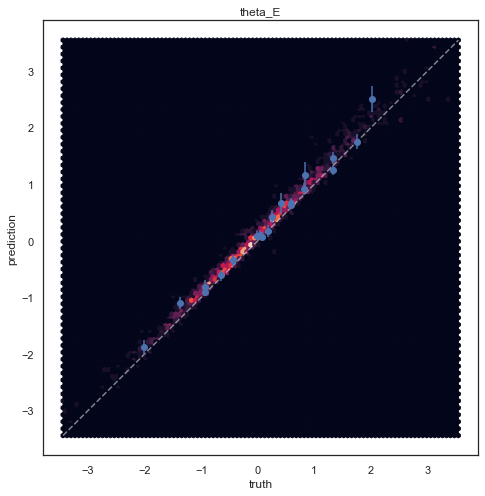

<Figure size 216x216 with 0 Axes>

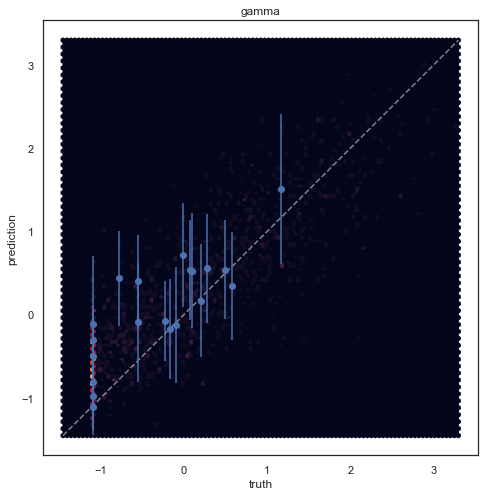

<Figure size 216x216 with 0 Axes>

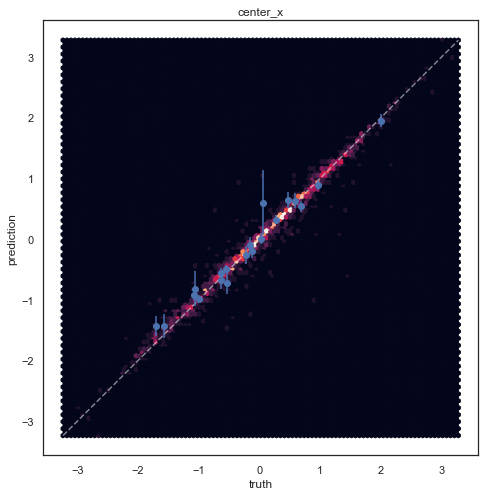

<Figure size 216x216 with 0 Axes>

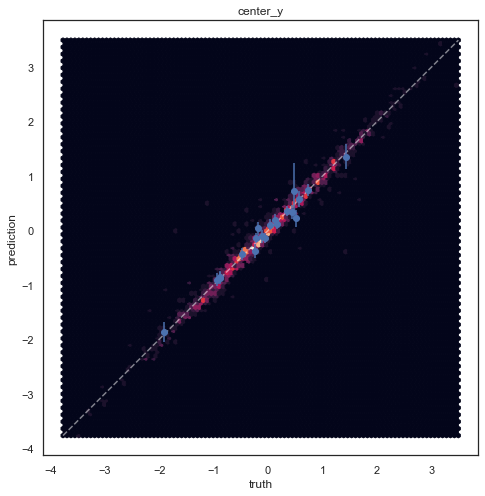

<Figure size 216x216 with 0 Axes>

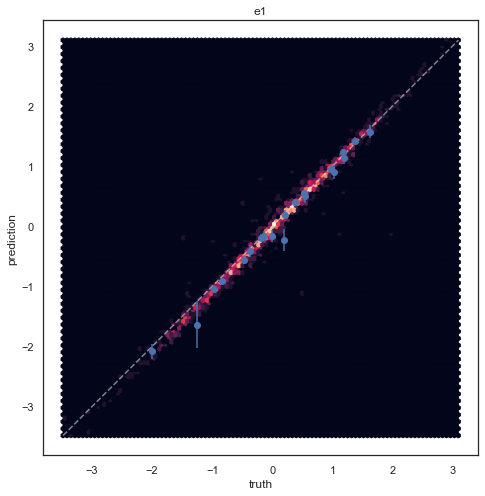

<Figure size 216x216 with 0 Axes>

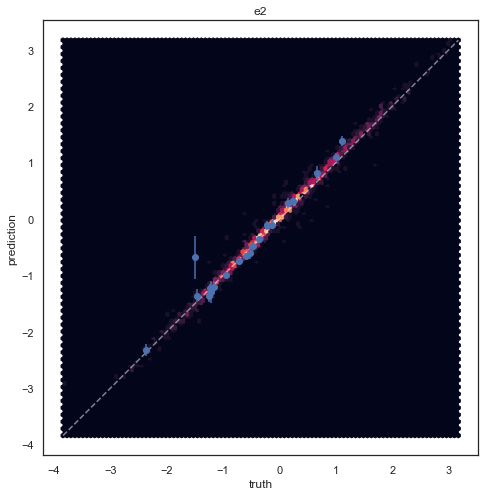

<Figure size 216x216 with 0 Axes>

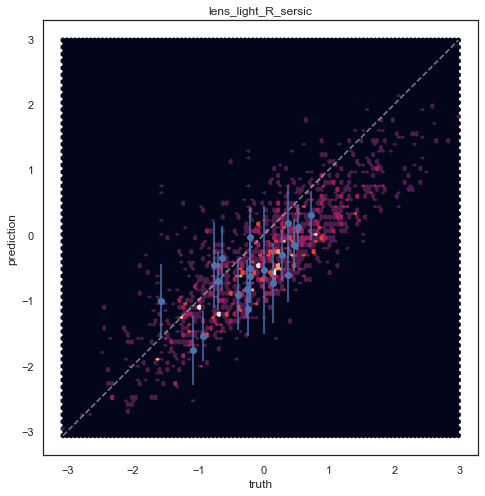

<Figure size 216x216 with 0 Axes>

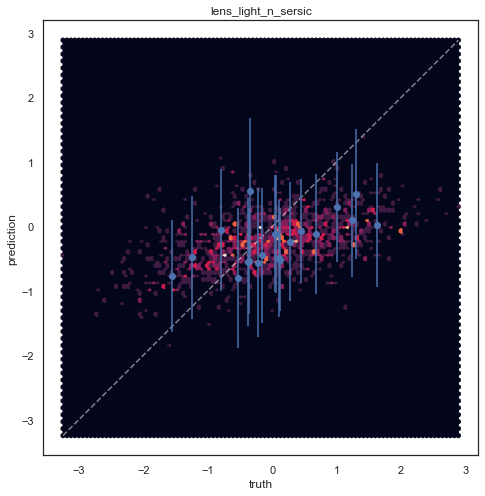

<Figure size 216x216 with 0 Axes>

In [28]:
for target in targets_list:
    plot_each_pred_truth_uncertainty(df, target)
